# Project 2 Challenges
**Using my data, stored in stats.pkl**

First, loading needed packages.

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
from IPython.core.display import display, HTML    # make sure Jupyter knows to display it as HTML
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import unicodedata
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
pwd

'/Users/patrickbovard/Documents/GitHub/Metis_Project_2'

Next, load my stats dataframe in from teh pickle file:

In [3]:
stats_df = pd.read_pickle("./stats.pkl")

## Data Cleaning:

Using same cleaning steps as in "first_model_notebook":

Fixing pitchers:

In [4]:
stats_df.iloc[714, 22] = 'DH' #Ohtani, 2018
stats_df.iloc[1021, 22] = 'LF' #Eibner, 2016
stats_df.iloc[1498, 22] = 'DH' #Ohtani, 2019
stats_df.iloc[1750, 22] = 'CF' #Gose, 2015
stats_df.iloc[1781, 22] = '1B' #Davis, 2015

Changing Kennys Vargas from IF to 1B:

In [5]:
stats_df.iloc[1477, 22] = '1B' #Kennys Vargas, 2017

In [6]:
stats_df.Position.value_counts()

3B    263
2B    245
C     239
CF    222
1B    218
LF    212
SS    207
RF    200
OF     56
DH     31
Name: Position, dtype: int64

In [7]:
stats_df.head()

,Player,Year,Age,PA,G,Avg EV (MPH),Avg LA (°),Barrel%,Solid Contact %,Hard Hit %,...,Straight Away %,Oppo %,GB%,FB%,LD %,Sprint Speed,Player Link_x,Player_Year_ID,wRC+,Position
0,"Saltalamacchia, Jarrod",2016.0,31.0,292.0,92.0,89.2,21.4,11.6,6.8,35.4,...,34.0,21.8,31.3,43.5,19.7,25.6,[/savant-player/457454],Jarrod Saltalamacchia-2016,70,C
1,"Schimpf, Ryan",2016.0,28.0,330.0,89.0,90.3,29.7,16.7,8.0,41.4,...,33.9,24.7,20.1,42.0,21.8,28.2,[/savant-player/572114],Ryan Schimpf-2016,128,3B
2,"Gallo, Joey",2017.0,24.0,532.0,145.0,93.3,23.0,22.1,8.3,52.2,...,29.2,20.6,29.2,37.9,22.1,27.8,[/savant-player/608336],Joey Gallo-2017,119,CF
3,"Carpenter, Matt",2018.0,33.0,677.0,156.0,90.7,21.6,13.7,11.5,44.7,...,30.7,21.7,28.3,37.8,28.5,26.5,[/savant-player/572761],Matt Carpenter-2018,140,3B
4,"Bruce, Jay",2019.0,32.0,333.0,98.0,90.2,21.4,13.4,8.2,43.7,...,29.9,27.3,29.4,37.7,19.9,26.7,[/savant-player/457803],Jay Bruce-2019,98,RF


## Challenge 1
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [22]:
ch1_df = stats_df[['Player', 'wRC+']].copy()

In [24]:
ch1_df['Constant'] = 1

In [25]:
ch1_df.head()

,Player,wRC+,Constant
0,"Saltalamacchia, Jarrod",70,1
1,"Schimpf, Ryan",128,1
2,"Gallo, Joey",119,1
3,"Carpenter, Matt",140,1
4,"Bruce, Jay",98,1


In [28]:
ch1_df.drop(columns='Player', inplace=True)

In [29]:
ch1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   wRC+      1893 non-null   int64
 1   Constant  1893 non-null   int64
dtypes: int64(2)
memory usage: 108.9 KB


In [30]:
ch1_df.corr()

,wRC+,Constant
wRC+,1.0,NaN
Constant,NaN,NaN


In [31]:
lr = LinearRegression()

In [35]:
X = ch1_df[['Constant']]
y = ch1_df[['wRC+']]

In [36]:
lr.fit(X, y)

LinearRegression()

In [37]:
lr.score(X,y)

0.0

In [38]:
lr.coef_

array([[0.]])

In [40]:
lr.intercept_

array([101.15742208])

In [41]:
ch1_df['wRC+'].mean()

101.15742208135235

This model simply predicts the mean value of the target wRC+ to be the outcome, as can be seen comparing the intercept to the computed mean of wRC+.

Scatter Plot:

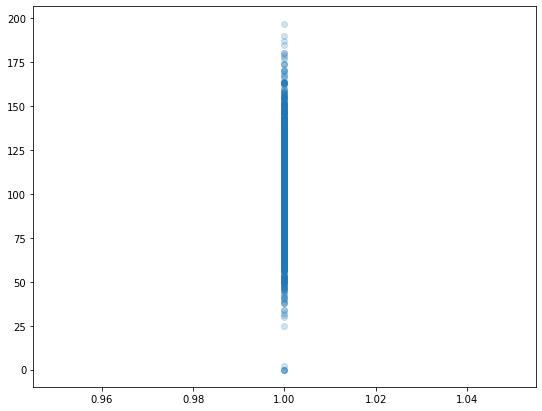

In [56]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(X, y, alpha=.2)
_x = np.linspace(X.min(), X.max())
_y = lr.predict(_x)
ax.plot(_x, _y, color='orange')

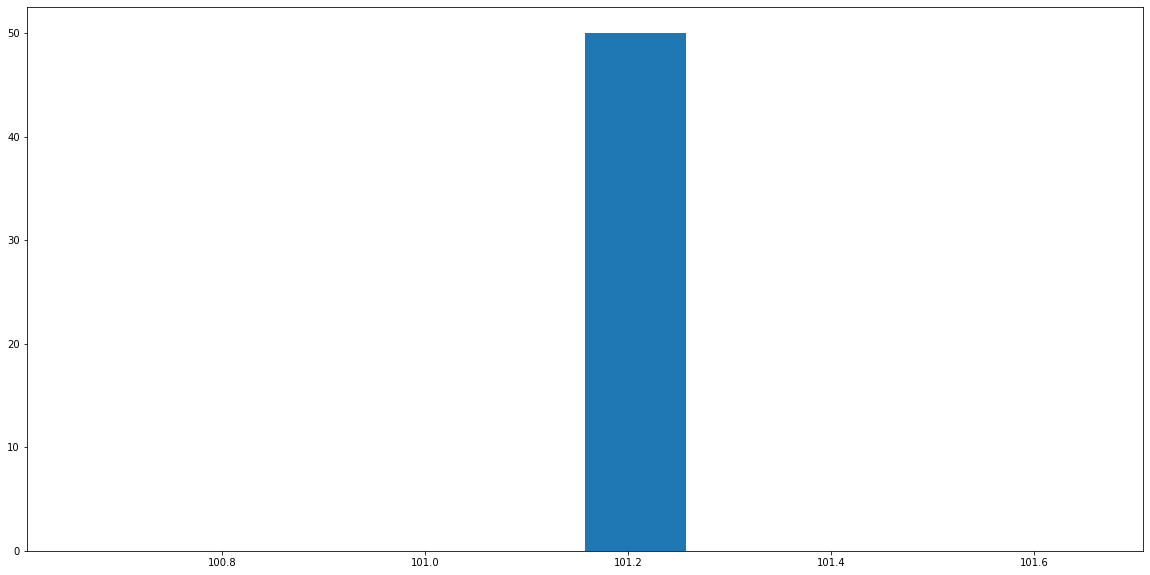

In [54]:
plt.hist(_y, bins=10);

All predictions are of the mean.

## Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [57]:
ch2_df = stats_df[['Avg EV (MPH)', 'wRC+']].copy()

In [58]:
ch2_df.head()

,Avg EV (MPH),wRC+
0,89.2,70
1,90.3,128
2,93.3,119
3,90.7,140
4,90.2,98


Text(0.5, 1.0, 'wRC+ vs. Avg. Exit Velocity for MLB Players')

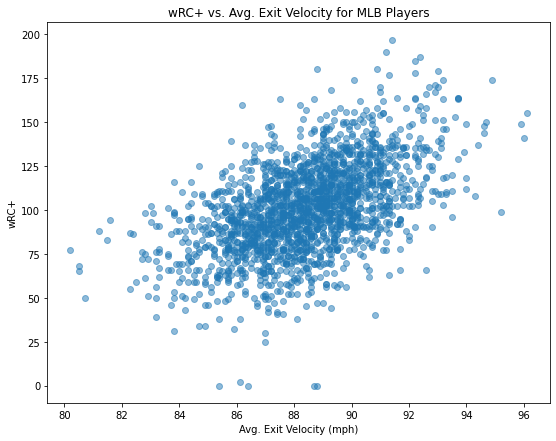

In [67]:
X = ch2_df[['Avg EV (MPH)']]
y = ch2_df['wRC+']
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(X, y, alpha=.5);
ax.set_xlabel('Avg. Exit Velocity (mph)')
ax.set_ylabel('wRC+')
ax.set_title('wRC+ vs. Avg. Exit Velocity for MLB Players')

In [68]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [69]:
lr.score(X,y)

0.27517352810524176

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
preds = lr.predict(X)

In [72]:
np.sqrt(mean_squared_error(y, preds))

22.132171505453723

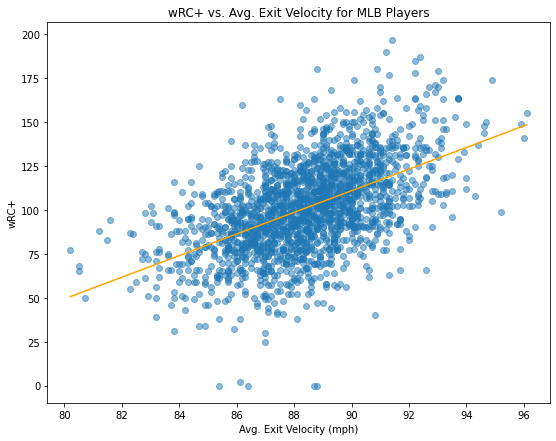

In [74]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(X, y, alpha=.5);
ax.set_xlabel('Avg. Exit Velocity (mph)')
ax.set_ylabel('wRC+')
ax.set_title('wRC+ vs. Avg. Exit Velocity for MLB Players')

_x = np.linspace(X.min(), X.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange')

Line Equation:

In [76]:
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')

slope: 6.16
y-intercept: -443.12


**Interpretation:**

Slope: If there are two groups of players with all else equal but avg. exit velocity, then a group with an increase of 1 mph in avg. exit velocity will result in an increase of 6.16 in wRC+ on average.

Intercept: a player with an avg. exit velocity of 0 mph will have a wRC+ of -443.12 - physically, any batted ball would have EV.  This is basically a player that would strike out every time, so statistically they would be horrible.

In [78]:
residuals = y-preds
residuals

0      -36.000299
1       15.228063
2      -12.240041
3       24.765649
4      -14.156334
          ...    
1888    -6.532196
1889     8.609614
1890     6.161425
1891   -13.303834
1892    -1.390386
Name: wRC+, Length: 1893, dtype: float64

(array([  3.,   4.,  22., 109., 375., 601., 508., 216.,  43.,  12.]),
 array([-103.53788553,  -85.43845451,  -67.3390235 ,  -49.23959249,
         -31.14016147,  -13.04073046,    5.05870055,   23.15813157,
          41.25756258,   59.3569936 ,   77.45642461]),
 <BarContainer object of 10 artists>)

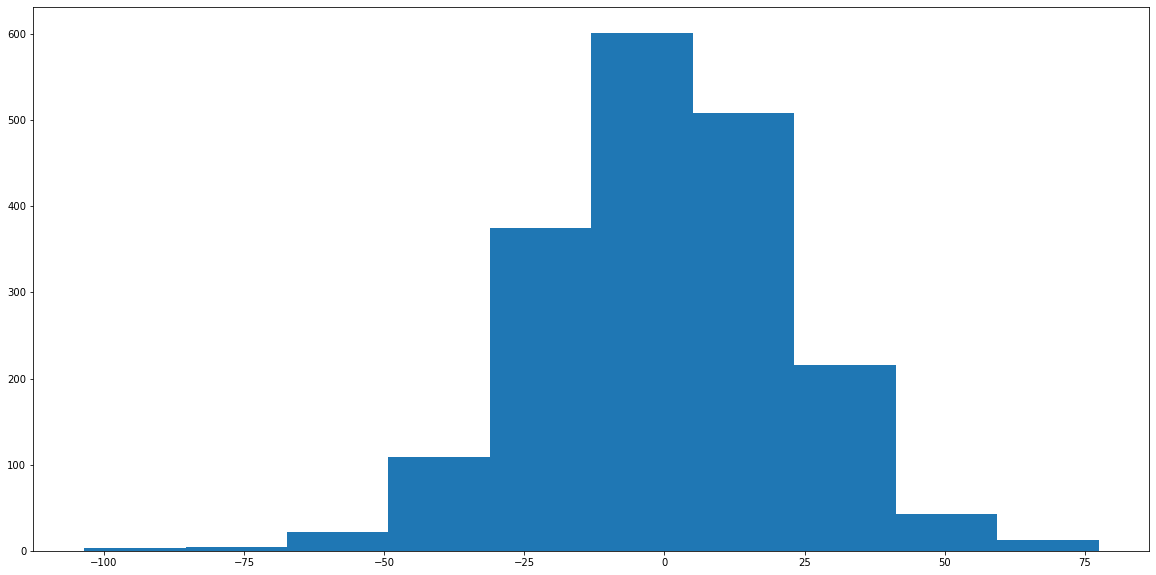

In [79]:
plt.hist(residuals)

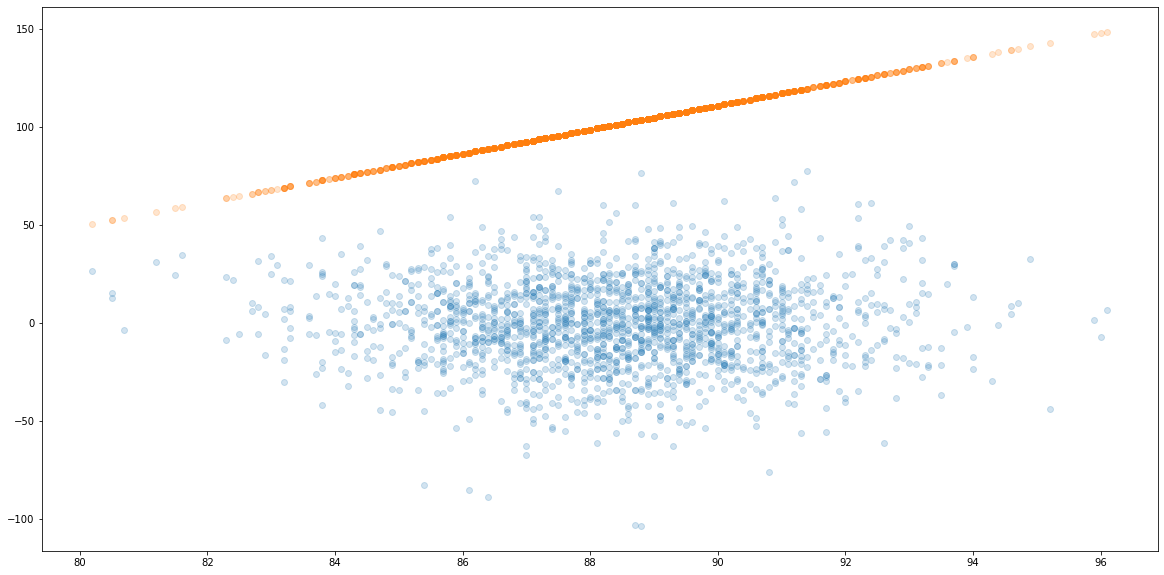

In [83]:
plt.scatter(X, residuals, alpha = 0.2)
plt.scatter(X, preds, alpha = 0.2)

## Challenge 3
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

Categorical features: position

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [86]:
ch3_df = stats_df[['Position', 'wRC+']].copy()

In [87]:
cat_X = ch3_df.loc[:, ['Position']]
cat_y = ch3_df['wRC+']

In [88]:
ohe = OneHotEncoder(drop='first', sparse=False)

In [89]:
ohe.fit(cat_X)

OneHotEncoder(drop='first', sparse=False)

In [90]:
ohe_X = ohe.transform(cat_X)

In [91]:
columns = ohe.get_feature_names(['Position'])

ohe_X_df = pd.DataFrame(ohe_X, columns=columns, index=cat_X.index)

ohe_X_df.head()

,Position_2B,Position_3B,Position_C,Position_CF,Position_DH,Position_LF,Position_OF,Position_RF,Position_SS
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [92]:
cat_lr = LinearRegression()

cat_lr.fit(ohe_X_df, cat_y)

cat_lr.score(ohe_X_df, cat_y)

0.0966879738087173

In [93]:
cat_lr.coef_

array([-14.4870249 ,  -6.11863816, -22.10890177, -16.95883957,
         3.99408109,  -3.41370954, -20.4120249 ,  -1.71559633,
       -17.8412002 ])